In [3]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [6]:
data = pd.read_excel('test.xlsx','Sheet1')

In [15]:
data.head(10)

,time,a,b,c,d,e,f
0,8703,5.263051e+07,3.423145e+07,178850.882,1.986349e+06,3.635370e+07,0.054640
1,8706,5.199664e+07,3.487945e+07,184556.733,1.873514e+06,3.568970e+07,0.052495
2,8709,5.452733e+07,3.720817e+07,202435.813,1.648667e+06,3.687188e+07,0.044713
3,8712,5.220097e+07,3.469676e+07,183035.286,2.278954e+06,3.526258e+07,0.064628
4,8803,5.060724e+07,3.135476e+07,164126.416,2.309560e+06,3.391740e+07,0.068094
5,8806,4.985278e+07,3.368308e+07,182473.415,2.176802e+06,3.331315e+07,0.065344
6,8809,5.336319e+07,3.416243e+07,193024.879,1.866568e+06,3.552690e+07,0.052540
7,8812,5.558258e+07,3.626236e+07,197788.959,1.946295e+06,3.639340e+07,0.053479
8,8903,4.879088e+07,3.184859e+07,169754.104,1.408697e+06,3.169385e+07,0.044447
9,8906,5.240948e+07,3.405950e+07,174675.012,1.547775e+06,3.409522e+07,0.045396


In [19]:
y = data['b']

In [20]:
y.head(10)

0    3.423145e+07
1    3.487945e+07
2    3.720817e+07
3    3.469676e+07
4    3.135476e+07
5    3.368308e+07
6    3.416243e+07
7    3.626236e+07
8    3.184859e+07
9    3.405950e+07
Name: b, dtype: float64

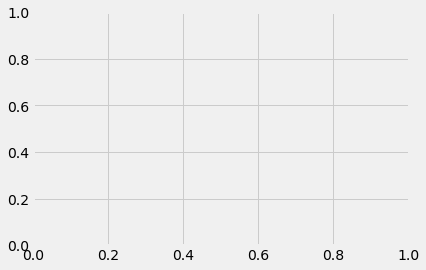

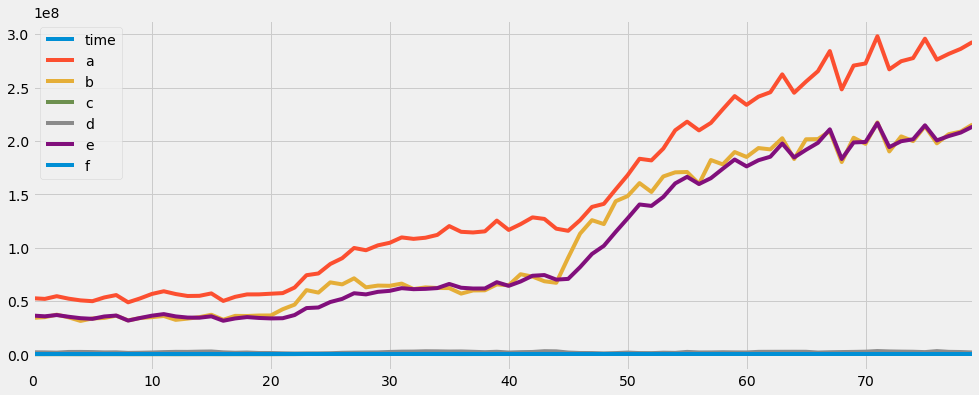

In [9]:
data.plot(figsize= (15,6))
plt.show()

In [27]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [10]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [28]:
#warnings.filterwarnings("ignore") # specify to ignore warning messages
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [41]:
data = sm.datasets.co2.load_pandas()
x = data.data
print(x.head())
print("\n")
# The 'MS' string groups the data in buckets by start of the month
x = x['co2'].resample('MS').mean()
print(x.head())
print("\n")
# The term bfill means that we use the value before filling in missing values
x = x.fillna(x.bfill())
print(x.head())

              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4


1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64


1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64
